In [1]:
from collections import defaultdict
import sys
import json

from helpers.dataset import IMPORTANT_TYPES_FINE, IMPORTANT_TYPE_DESCRIPTIONS_FINE

from helpers.dataset import get_dataset
from src.framework_split import construct_cim_split

from helpers.dataset import MUFFIN_TASK, CUSTOM_TASKS, CROSS_TASK_TASKS

task = MUFFIN_TASK
# task = CUSTOM_TASKS[14]

results = construct_cim_split(task, get_dataset(task), "trial_1")

dataset = results['labeled_dataset']
facet_candidates = results['facet_candidates']
piece_types = IMPORTANT_TYPES_FINE

In [3]:
from helpers.cim_scripts import get_cell_to_units
# for i in range(len(dataset)):
#     display_tutorial_contexts(dataset[i])
# display_units(dataset, include_keys=['context_stage'])
# display_units(dataset, include_keys=['context_stage'], 
# include_content_types=IMPORTANT_TYPES_FINE)
# display_type_distribution(dataset)

cell_to_units, _ = get_cell_to_units(results["context_schema"], results["labeled_dataset"], IMPORTANT_TYPES_FINE)

calc_sparsity(cell_to_units, 181)

1 unit size: 1 cells
2 unit size: 1 cells
5 unit size: 1 cells
6 unit size: 1 cells
11 unit size: 1 cells
14 unit size: 1 cells
16 unit size: 1 cells
18 unit size: 1 cells
40 unit size: 1 cells
51 unit size: 1 cells
99 unit size: 1 cells
242 unit size: 1 cells


In [ ]:
from helpers.cim_scripts import get_cell_to_units
from helpers.cim_scripts import calc_discriminativeness



unique_facets = {}
for facet in facet_candidates:
    if facet["title"] not in unique_facets:
        unique_facets[facet["title"]] = []
    unique_facets[facet["title"]].append(facet)

# for facets_per_title in unique_facets.values():
#     print(facets_per_title[0]["title"], len(facets_per_title))

stage_facets = unique_facets["Stage"]

stage_facets = sorted(stage_facets, key=lambda x: len(x["vocabulary"]), reverse=True)

cur_types = ["Method - Subgoal", "Method - Instruction", "Method - Tool",
    "Supplementary - Tip", "Supplementary - Warning",
    "Explanation - Justification", "Explanation - Effect",
    "Description - Status", "Description - Context", "Description - Tool Specification",
    "Conclusion - Outcome", "Conclusion - Reflection",
]

# subset_facets = []
# for stage_facet in stage_facets:
#     subset_facets.append(stage_facet)
#     cur_ctu, cur_ruc = get_cell_to_units(subset_facets, dataset, cur_types[3:])
#     d = calc_discriminativeness(cur_ctu, cur_ruc)
#     print(d)
cur_facets = stage_facets[:2]
cur_ctu, cur_ruc = get_cell_to_units(cur_facets, dataset, cur_types[1:2])
d = calc_discriminativeness(cur_ctu, cur_ruc)
sorted_ctu = sorted(cur_ctu.items(), key=lambda x: x[0], reverse=True)
for cell, units in sorted_ctu:
    print(len(units), '\t', cell)
    print(list(units.values())[0][0]['content'])

print(json.dumps({
    "definition-1": cur_facets[0]["definition"],
    "definition-2": cur_facets[1]["definition"],
    "guidelines-1": cur_facets[0]["guidelines"],
    "guidelines-2": cur_facets[1]["guidelines"],
    "vocabulary-1": [f"{label['label']}: {label['definition']}" for label in cur_facets[0]["vocabulary"]],
    "vocabulary-2": [f"{label['label']}: {label['definition']}" for label in cur_facets[1]["vocabulary"]],
}, indent=4))

7 	 <Method - Instruction><topping/filling><portion>
Sprinkle the crumbly topping over the batter.
18 	 <Method - Instruction><topping/filling><ingredient-prep>
In a small bowl, combine rolled oats, 1/2 cup flour, 1/2 cup brown sugar, roasted pumpkin seeds, and softened butter.
10 	 <Method - Instruction><setup><setup>
Place paper liners in a muffin pan.
6 	 <Method - Instruction><setup><portion>
Grease muffin tins or line muffin tins with paper cups.
2 	 <Method - Instruction><setup><ingredient-prep>
Grate 1 cup of carrot.
5 	 <Method - Instruction><setup><bake>
Preheat oven to 350F (180C).
2 	 <Method - Instruction><rest/chill><mixing>
Refrigerate the batter for at least one hour.
38 	 <Method - Instruction><mix wet><mixing>
Mix canned pumpkin, oil, and sugar together either by hand or with a mixer on low.
15 	 <Method - Instruction><mix wet><ingredient-prep>
Mix together cream cheese, sugar, egg yolk, and vanilla until well combined.
9 	 <Method - Instruction><mix dry><mixing>
Add t

### Understanding discriminative-compact frontier

{'compactness': 29, 'discriminativeness': 1.6219606814423067, 'explained_norm': 0.8192105213903745, 'facets': ['F2382f991-7367-49d1-9844-299f849c3ac4', 'F4ce0f1fd-fcc2-4520-8b3d-4c1bf26dd918', 'Ffc3108b8-5a46-43ad-bff1-85fe72c4c5ce', 'F5026b301-26a2-41b9-ac49-f66f8fb96f9a']} 0.9
{'compactness': 29, 'discriminativeness': 1.6219606814423067, 'explained_norm': 0.8192105213903745, 'facets': ['F2382f991-7367-49d1-9844-299f849c3ac4', 'F4ce0f1fd-fcc2-4520-8b3d-4c1bf26dd918', 'Ffc3108b8-5a46-43ad-bff1-85fe72c4c5ce', 'F5026b301-26a2-41b9-ac49-f66f8fb96f9a']} 0.91
{'compactness': 32, 'discriminativeness': 1.3609171811254022, 'explained_norm': 0.8483073539194825, 'facets': ['F2382f991-7367-49d1-9844-299f849c3ac4', 'Fe64622bd-7a3e-482a-9c35-09f922ab0d6e', 'F4ce0f1fd-fcc2-4520-8b3d-4c1bf26dd918', 'Ffc3108b8-5a46-43ad-bff1-85fe72c4c5ce']} 0.92
{'compactness': 36, 'discriminativeness': 1.029349025281499, 'explained_norm': 0.8852651141811368, 'facets': ['F2382f991-7367-49d1-9844-299f849c3ac4', 'Fe6462

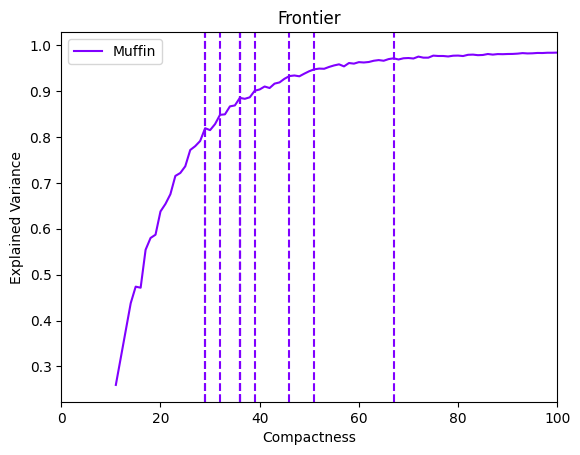

In [ ]:
from helpers import count_tokens
from collections import defaultdict



In [10]:
cur_types = ["Method - Subgoal", "Method - Instruction", "Method - Tool",
    "Supplementary - Tip", "Supplementary - Warning",
    "Explanation - Justification", "Explanation - Effect",
    "Description - Status", "Description - Context", "Description - Tool Specification",
    "Conclusion - Outcome", "Conclusion - Reflection",
]

# tasks = CUSTOM_TASKS + [MUFFIN_TASK]

# hat_tasks = [CUSTOM_TASKS[14], CUSTOM_TASKS[14]]
# hat_dummies = ["trial_1", "full_run_1"]
# results = get_available_results(hat_tasks, hat_dummies)

tasks_trial_1 = [CUSTOM_TASKS[14]] + [MUFFIN_TASK]
dummies_trial_1 = ["trial_1"] * 2


tasks_full_run_1 = CUSTOM_TASKS
dummies_full_run_1 = ["full_run_1"] * len(tasks_full_run_1)

tasks_full_run_2 = CUSTOM_TASKS
dummies_full_run_2 = ["full_run_2"] * len(tasks_full_run_2)

tasks_full_run_3 = CROSS_TASK_TASKS
dummies_full_run_3 = ["full_run_3"] * len(tasks_full_run_3)

tasks = tasks_full_run_1 + tasks_trial_1 + tasks_full_run_2 + tasks_full_run_3
dummies = dummies_full_run_1 + dummies_trial_1 + dummies_full_run_2 + dummies_full_run_3

results = get_available_results(tasks, dummies)

Found task: how_to_make_a_milkshake_without_ice_cream_full_run_1
Found task: how_to_make_scrambled_eggs_in_a_microwave_full_run_1
Found task: how_to_grow_hydrangea_from_cuttings_full_run_1
Found task: how_to_clean_bathroom_tile_full_run_1
Found task: how_to_polish_stainless_steel_full_run_1
Found task: how_to_wrap_your_hands_for_boxing_full_run_1
Found task: how_to_make_a_paper_hat_full_run_1
Found task: how_to_make_a_paper_hat_trial_1
Found task: making_muffins_trial_1


9
ELBOW for how_to_make_a_milkshake_without_ice_cream_full_run_1
{
    "compactness": 39,
    "discriminativeness": 0.6999290815987754,
    "explained_norm": 0.9246016998889416,
    "facets": [
        "F8d3bbf1e-c859-44c6-b065-84b0dd74ca8d",
        "F41b87a4e-4d34-4c19-9b35-02ed4756a845",
        "F8b3a0bb6-fb7a-4fe2-9d63-62c662d43b4f",
        "Fe3b1392c-62b4-4dc8-8e6f-a3e2be4ad43f",
        "F1f5ff45f-247b-495c-a305-6d80a22aace0",
        "F11d0b181-dd9f-4cf5-810f-c7a7a4ca39f0",
        "Fe518a32f-5c5e-47ef-9453-5b8e4784a754"
    ]
}
ELBOW FACETS:  ['Method', 'Ingredient', 'Quantity', 'Purpose', 'Addition Timing', 'Flavor', 'Blend method']
ELBOW for how_to_make_scrambled_eggs_in_a_microwave_full_run_1
{
    "compactness": 43,
    "discriminativeness": 0.9649633673392044,
    "explained_norm": 0.9094173087297563,
    "facets": [
        "F46f76389-e661-42eb-8081-7179b3cc2272",
        "Fbb27ce31-47cc-4d5c-9fef-650e5c5a2084",
        "F3d73ae6a-c9e0-4694-97a9-03b762d6e4d0",
        "

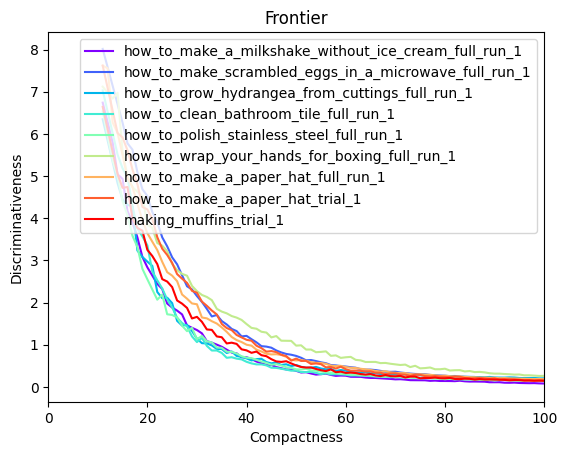

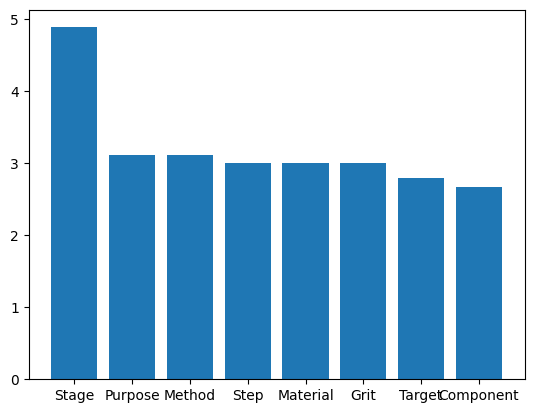

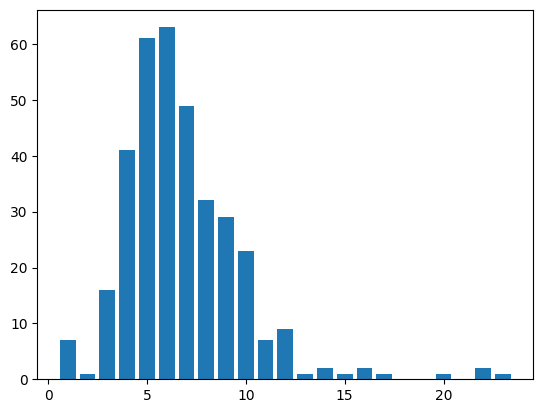

In [11]:
# for task, result in results.items():
#     show_task_stats(task, result, cur_types)

# ## over facets
# draw_frontiers(results, cur_types, 0.95, None, False, 20)

## over values
draw_frontiers(results, cur_types, 0.95, None)

distribution_of_labels(results, top_k=8)